In [1]:
import pandas as pd
df = pd.read_csv('iris.data.csv', header = None)
df.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
print(df.tail())

     sepal_len  sepal_wid  petal_len  petal_wid           class
145        6.7        3.0        5.2        2.3  Iris-virginica
146        6.3        2.5        5.0        1.9  Iris-virginica
147        6.5        3.0        5.2        2.0  Iris-virginica
148        6.2        3.4        5.4        2.3  Iris-virginica
149        5.9        3.0        5.1        1.8  Iris-virginica


In [2]:
# split data table into data X and class labels y
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

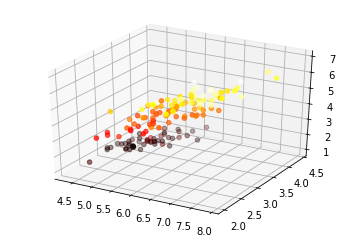

In [3]:
#heatplot using matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c=X[:,3], cmap = plt.hot())
plt.show()

In [4]:
#scale features if necessary, not necessary here
import numpy as np

mean_vec = np.mean(X, axis=0)

X=X-mean_vec
#calculating cov_mat or cor_mat
#cov_mat = (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0]-1)

# can use corelation insead
cor_mat = np.corrcoef(X.T)#

# eigen decomposition

eig_vals, eig_vecs = np.linalg.eig(cor_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


#eig_vals, eig_vecs = np.linalg.eig(cov_mat)
#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)



Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[ 2.91081808  0.92122093  0.14735328  0.02060771]


In [5]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.91081808375
0.921220930707
0.147353278305
0.0206077072356


In [6]:
#picking most informative features , EXPLAINED VARIANCE: HOW MUCH INFO COULD BE ATTRIBUTED TO EACH OF THE PRINCIPAL COMPONENTS
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in (eig_vals)]
cum_var_exp = np.cumsum(var_exp)

print(cum_var_exp)

[ 72.77045209  95.80097536  99.48480732 100.        ]


In [7]:
# PROJECTION MATRIX
proj_mat = eig_vecs[ : , 0:2]
print(proj_mat.shape)


(4, 2)


(150, 2)


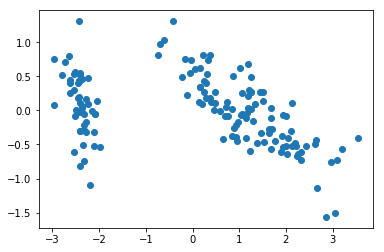

In [8]:
#PROJECT ALONG NEW AXES
Y = X.dot(proj_mat)

print(Y.shape)
plt.scatter(Y[:,0],Y[:,1])
plt.show()